In [88]:
from qiskit import*

In [89]:
secretnumber='101001'
num=101001

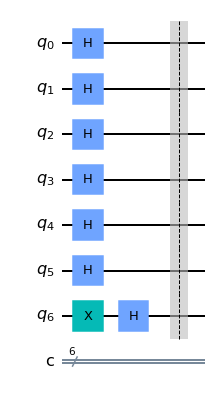

In [90]:
circuit=QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()
circuit.draw()

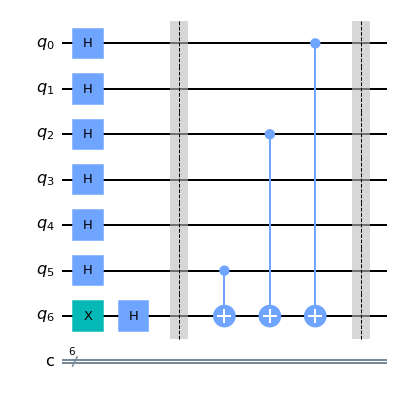

In [91]:
i=0
for i in range (len(secretnumber)):
    dig=int(num%10) 
    num=num/10
    #print (dig)
    if (dig==1):
        circuit.cx(len(secretnumber)-(i+1),(len(secretnumber)))
circuit.barrier()
circuit.draw()

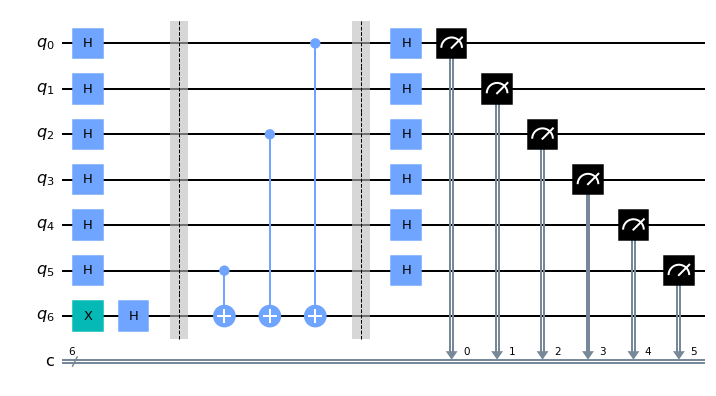

In [92]:
circuit.h(range(len(secretnumber)))
circuit.measure((range(len(secretnumber))),range(len(secretnumber)))
circuit.draw()

In [93]:
backend=Aer.get_backend('qasm_simulator')
res=execute(circuit,backend=backend,shots=10240).result()

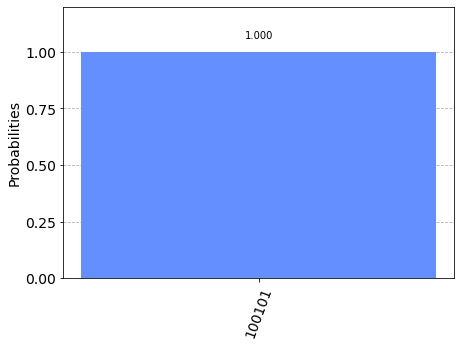

In [94]:
counts=res.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)